<a href="https://colab.research.google.com/github/justinballas/Articles/blob/main/Copy_of_Excel_Python_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming is becoming more and more popular in business analytics and is a great supplement or even alternative to excel. However, many excel users do not see the upside of learning to code. The gripes often come in the form of "I'm just so used to Excel" or "I'm visual, I like to see what I'm doing".

Fortunately, these are not issues for python users, and in fact, having an understanding of excel can give you a head start when learning to code.

Many of the concepts that Excel uses come from programming, and there have been many features included in python packages that were made for people that are used to Excel.

Here are a few popular Excel functions and features that can be replicated in Python.

1. Spreadsheets

Using spreadsheets is easy in python by using open source packages like "Pandas", let's see how it's done by importing pandas and its functions to load a CSV.

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 2.9MB/s 


In [ ]:
#importing pandas as the alias pd
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

#creating the dataframe "df" object from the csv file
df = pd.read_excel('Financial Sample.xlsx',index_col=0)

#displaying the dataframe
df.head()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date
SaleID,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,2014-01-01
2,Government,Germany,Carretera,1321.0,10,20,2014-01-01
3,Midmarket,France,Carretera,2178.0,10,15,2014-06-01
4,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01
5,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01


2. Working with columns

In python you can easily create calculated columns. My favorite way to do this is to utilize the lambda function. the lambda function allows you to quickly turn your dataframe into a variable (in this case x) so it can easily be used in a function. We will use lambda to add a few new columns to work with.



1.   COGS (Units Sold * Manufacturing price)
2.   Gross Profit (Units Sold * Share Price)
3.   Net Income (Gross Profit - COGS)
4.   Net Income Less Discounts (Net Income - Discounts)



In [ ]:
#make sure to set the axis argument to 1 to calculate columns as opposed to rows.
df['COGS'] = df.apply(lambda x: x['Units Sold'] * x['Manufacturing Price'],axis=1)

df['Gross Profit'] = df.apply(lambda x: x['Units Sold'] * x['Sale Price'], axis=1)

df['Net Income'] = df.apply(lambda x: x['Gross Profit'] - x['COGS'], axis=1)

df['Margin'] = df.apply(lambda x: x['Net Income'] / x['Gross Profit'], axis=1)

df.head()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,Gross Profit,Net Income,Margin
SaleID,,,,,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,2014-01-01,16185.0,32370.0,16185.0,0.500000
2,Government,Germany,Carretera,1321.0,10,20,2014-01-01,13210.0,26420.0,13210.0,0.500000
3,Midmarket,France,Carretera,2178.0,10,15,2014-06-01,21780.0,32670.0,10890.0,0.333333
4,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01,8880.0,13320.0,4440.0,0.333333
5,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01,24700.0,37050.0,12350.0,0.333333


Python also has a datetime module that takes the place of excel functions like Year(), Month() and Today(). let's use the datetime module to create a month column from the date column. the strftime function allows us to format dates. Check out https://strftime.org/ for more date format code examples. In out case %B returns the month.

let's take a look at what we did.

In [ ]:
df['Month'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%B'))

let's take a look at what we did

Also we need to format our columns. Manufacturing price, sale price, COGS Gross Profit and Net income should be in currency format, and Margin should be in percent format. For this we can use the style attribute of the Pandas dataframe.

In [ ]:
format_dict = {'Manufacturing price': '${:,.0f}', 'Sale Price': '${:,.0f}', 'COGS':'${:,.0f}',
               'Gross Profit':'${:,.0f}', 'Net Income':'${:,.0f}', 'Margin':'{:.2%}'}

df.style.format(format_dict)

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,Gross Profit,Net Income,Margin,Month
SaleID,,,,,,,,,,,,
1,Government,Canada,Carretera,1618.500000,10,$20,2014-01-01 00:00:00,"$16,185","$32,370","$16,185",50.00%,January
2,Government,Germany,Carretera,1321.000000,10,$20,2014-01-01 00:00:00,"$13,210","$26,420","$13,210",50.00%,January
3,Midmarket,France,Carretera,2178.000000,10,$15,2014-06-01 00:00:00,"$21,780","$32,670","$10,890",33.33%,June
4,Midmarket,Germany,Carretera,888.000000,10,$15,2014-06-01 00:00:00,"$8,880","$13,320","$4,440",33.33%,June
5,Midmarket,Mexico,Carretera,2470.000000,10,$15,2014-06-01 00:00:00,"$24,700","$37,050","$12,350",33.33%,June
6,Government,Germany,Carretera,1513.000000,260,$350,2014-12-01 00:00:00,"$393,380","$529,550","$136,170",25.71%,December
7,Midmarket,Germany,Montana,921.000000,10,$15,2014-03-01 00:00:00,"$9,210","$13,815","$4,605",33.33%,March
8,Channel Partners,Canada,Montana,2518.000000,3,$12,2014-06-01 00:00:00,"$7,554","$30,216","$22,662",75.00%,June
9,Government,France,Montana,1899.000000,10,$20,2014-06-01 00:00:00,"$18,990","$37,980","$18,990",50.00%,June


Unfortunately this cannot be permanently applied to the dataframe, you must always add style.format to the end of your dataframe output if you want the values to be formatted in the ways that you specify.

2. Sort and Filter

Let's sort the data by the "Total" column in descending order. We can do this by sing the pandas sort_values function with the column name that we want to sort by as the argument. The default order is ascending, if you want descending order, specify the argument "ascending=False". Set the inplace argument to True.

In [ ]:
df.sort_values(by='Net Income', ascending=False ,inplace=True)
df

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,Gross Profit,Net Income,Margin,Month
SaleID,,,,,,,,,,,,
193,Government,United States of America,Paseo,3450.0,260,350,2014-07-01,897000.0,1207500.0,310500.0,0.257143,July
125,Government,Germany,Velo,2966.0,260,350,2013-10-01,771160.0,1038100.0,266940.0,0.257143,October
141,Government,Germany,Amarilla,2966.0,260,350,2013-10-01,771160.0,1038100.0,266940.0,0.257143,October
134,Government,Germany,VTT,2877.0,260,350,2014-10-01,748020.0,1006950.0,258930.0,0.257143,October
126,Government,Germany,Velo,2877.0,260,350,2014-10-01,748020.0,1006950.0,258930.0,0.257143,October
...,...,...,...,...,...,...,...,...,...,...,...,...
623,Government,Germany,VTT,280.0,5,7,2014-12-01,1400.0,1960.0,560.0,0.285714,December
616,Government,Germany,Carretera,280.0,5,7,2014-12-01,1400.0,1960.0,560.0,0.285714,December
279,Government,United States of America,Carretera,263.0,5,7,2013-11-01,1315.0,1841.0,526.0,0.285714,November


Now let's filter for only the Amarilla product using a logical filter on the dataframe



In [ ]:
filt = df['Product'] == 'Amarilla'

df[filt]

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,Gross Profit,Net Income,Margin,Month
SaleID,,,,,,,,,,,,
141,Government,Germany,Amarilla,2966.0,260,350,2013-10-01,771160.0,1038100.0,266940.0,0.257143,October
354,Government,France,Amarilla,2876.0,260,350,2014-09-01,747760.0,1006600.0,258840.0,0.257143,September
46,Government,France,Amarilla,2750.0,260,350,2014-02-01,715000.0,962500.0,247500.0,0.257143,February
487,Government,Canada,Amarilla,2240.0,260,350,2014-02-01,582400.0,784000.0,201600.0,0.257143,February
304,Government,France,Amarilla,2076.0,260,350,2013-10-01,539760.0,726600.0,186840.0,0.257143,October
...,...,...,...,...,...,...,...,...,...,...,...,...
610,Government,France,Amarilla,1190.0,5,7,2014-06-01,5950.0,8330.0,2380.0,0.285714,June
223,Government,Germany,Amarilla,1159.0,5,7,2013-10-01,5795.0,8113.0,2318.0,0.285714,October
52,Government,United States of America,Amarilla,1143.0,5,7,2014-10-01,5715.0,8001.0,2286.0,0.285714,October


If you have a particularly long filter, you can set it may be useful to set it to its own variable and then apply that to our dataframe.

In [ ]:
#creating a variable with our filter
filt = (df['Manufacturing Price']  > 100) & (df['Manufacturing Price'] < 150) & df['Country'].str.startswith('C')

#returning a dataframe with our filter applied
df[filt].sort_values(by='Net Income', ascending=False)

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Date,COGS,Gross Profit,Net Income,Month,Years Since Sale
SaleID,,,,,,,,,,,,,
693,Enterprise,Canada,VTT,2954.0,120,125,369250.0,2013-11-01,354480.0,369250.0,14770.0,November,7
135,Enterprise,Canada,VTT,2729.0,120,125,341125.0,2014-12-01,327480.0,341125.0,13645.0,December,6
119,Enterprise,Canada,Paseo,2729.0,120,125,341125.0,2014-12-01,327480.0,341125.0,13645.0,December,6
12,Enterprise,Canada,Montana,2665.5,120,125,333187.5,2014-07-01,319860.0,333187.5,13327.5,July,6
484,Enterprise,Canada,VTT,2529.0,120,125,316125.0,2014-11-01,303480.0,316125.0,12645.0,November,6
538,Enterprise,Canada,Carretera,2416.0,120,125,302000.0,2013-09-01,289920.0,302000.0,12080.0,September,7
166,Enterprise,Canada,Velo,2009.0,120,125,251125.0,2014-10-01,241080.0,251125.0,10045.0,October,6
162,Enterprise,Canada,Paseo,2009.0,120,125,251125.0,2014-10-01,241080.0,251125.0,10045.0,October,6
476,Enterprise,Canada,Velo,1916.0,120,125,239500.0,2013-12-01,229920.0,239500.0,9580.0,December,7


3. SUMIF, AVERAGEIF, COUNTIF

To replicate the SUMIF function, lets return the sum, average, and count of the "Total" column where the product is a Pen by using a filter.

In [ ]:
filt = df['Segment']=='Small Business'
df[filt]['Manufacturing Price'].sum()

25000

In [ ]:
filt = df['Segment']=='Small Business'
df[filt]['Manufacturing Price'].mean()

250.0

In [ ]:
filt = df['Segment']=='Small Business'
df[filt]['Segment'].count()

100

4. Lookups (LOOKUPS, INDEX/MATCH, INDEX)

You may find that lookups in python are more intuative than in excel. To replicate lookups, we will use the Pandas loc (locate) function. Let's find the item orderd by the rep named Trevino.

In [ ]:
df.loc[df.index == 453, 'Product']

SaleID
453    Amarilla
Name: Product, dtype: object

Looks like the product from this sale was Amarilla, how insightful! the pandas loc function is capable of giving you the same output as vlookup, hlookup, xlookup, and index/match.

Now let's try to replicate the excel INDEX function to find the value at the coordinates (5, 2). To do this, we can use the Pandas iloc (integer locate) function. Just remember that in python indexes start with zero and not 1.

In [ ]:
df.iloc[5,2]

'Amarilla'

I know what you're thinking, this is hardly helpful. Usually you have a list of lookup values, right? Well you can do that in python, too. Just initialize a list of values, and use a loop. It's just like dragging down a formula in Excel.



In [ ]:
sales_list = [520, 342, 20, 406, 399, 49]

df.loc[df.index == 453, ['Product', 'Country', 'Net Income']]

for sale in sales_list:
    lookup = df.loc[df.index == sale, ['Product', 'Country', 'Net Income']]
    print(lookup)
    print('-'*50)

       Product Country  Net Income
SaleID                            
520      Paseo  France     12205.0
--------------------------------------------------
       Product  Country  Net Income
SaleID                             
342      Paseo  Germany      4250.0
--------------------------------------------------
       Product  Country  Net Income
SaleID                             
20       Paseo  Germany     90540.0
--------------------------------------------------
        Product Country  Net Income
SaleID                             
406     Montana  Canada    190125.0
--------------------------------------------------
         Product  Country  Net Income
SaleID                               
399     Amarilla  Germany     15200.0
--------------------------------------------------
         Product Country  Net Income
SaleID                              
49      Amarilla  France     18990.0
--------------------------------------------------


5. Pivot Tables

Now this is where it starts getting really fun. Excel Pivot tables allow you to quickly perform aggregate calculations on your data. Python also has a Pivot Table function.

Let's see how many units were ordered for each product using the pivot_table function.

In [ ]:
df.pivot_table(index='Product', values='Units Sold', aggfunc='sum').style.format('{:.0f}')

,Units Sold
Product,
Amarilla,1652.287234
Carretera,1578.989247
Montana,1658.043011
Paseo,1674.452970
VTT,1548.467890
Velo,1490.133028


What if we want to perform multiple calculations on the data? The aggfunc argument where we specify the type of calculation we want can also take in a list of values. let's include the sum, mean, min, max, and standard deviation of units ordered by region.

In [ ]:
func_list = ['sum','mean', 'min', 'max', 'std']

df.pivot_table(index='Country', values='Units Sold', aggfunc=func_list).style.format('{:.0f}')

,mean,min,max,std
,Units Sold,Units Sold,Units Sold,Units Sold
Country,,,,
Canada,1767,200,4251,874
France,1721,293,4244,839
Germany,1439,214,4220,828
Mexico,1452,245,2993,778
United States of America,1662,263,4492,965


Now let's specify the 'columns' argument. Lets add 'Item' to the columns argument so we can break down the units sold by region and by item.

In [ ]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', aggfunc='sum').style.format('{:.0f}')

Country,Canada,France,Germany,Mexico,United States of America
Product,,,,,
Amarilla,1624,1756,1701,1420,1773
Carretera,1740,1892,1247,1512,1519
Montana,1749,1564,1559,1588,1860
Paseo,1862,1790,1392,1582,1737
VTT,1875,1626,1415,1306,1500
Velo,1623,1664,1411,1206,1555


I know what you're thinking, that does look a lot like an Excel pivot table, but where's the grand total? To add the grand total, specify the margins argument to equal True, and if you want, you can even set the margins_name argument to 'Grand Total'.

In [ ]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', aggfunc='sum',
               margins=True, margins_name='Grand Total').style.format('{:.0f}')

Now, what if we want to break out our data even further? We can do this by passing a list of columns into the index argument instead of a single column

In [2]:
df.pivot_table(index=['Product', 'Segment'], columns='Country', values='Units Sold',
               aggfunc='sum', margins=True, margins_name='Grand Total').style.format('{:.0f}')

NameError: ignored

6. Charts

Let's wrap this up by making a pviot chart showing number of units sold by product and country. To make this chart we will use the Pandas built in graphing capabilities, based on the matplotlib graphing library. Matplotlib is only one of many graphing libraries that Python has to offer. Check out seaborn, matplotlib, and if you've used R in the past, you may be happy to learn that you can even use ggplot in python.

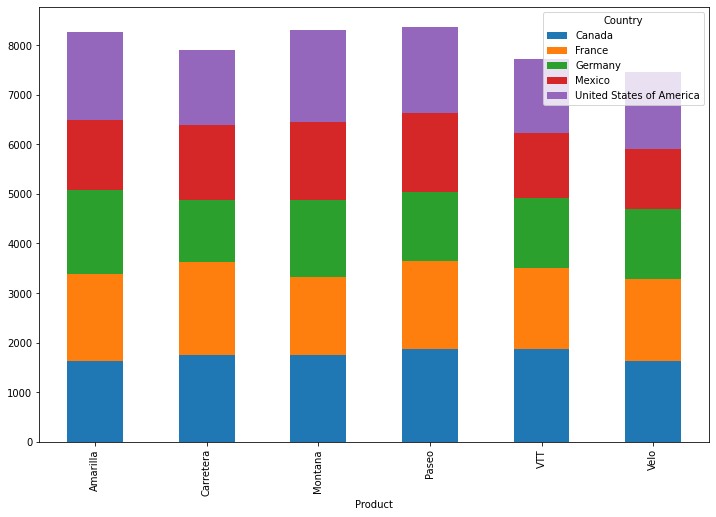

In [ ]:
pivot_table = df.pivot_table(index='Product', columns='Country',values='Units Sold', 
               aggfunc='mean').plot(kind='bar', figsize = [12,8], legend=True, stacked=True)

Here is a complimentary python project that you can build yourself. This project will automate the aggregation of data into a a multiple sheet excel report and give you a quick glimpse of the powerful and useful python library "xlsxwriter".

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 30.2MB/s 


AttributeError: ignored

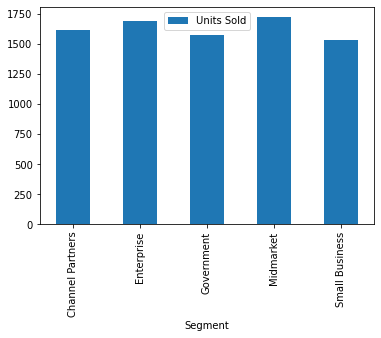

In [ ]:
#importing pandas as the alias pd
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
%matplotlib inline

#creating the dataframe "df" object from the csv file
df = pd.read_excel('Financial Sample.xlsx', index_col=0)

#adding calculated columns
df['COGS'] = df.apply(lambda x: x['Units Sold'] * x['Manufacturing Price'],axis=1)
df['Gross Profit'] = df.apply(lambda x: x['Units Sold'] * x['Sale Price'], axis=1)
df['Net Income'] = df.apply(lambda x: x['Gross Profit'] - x['COGS'], axis=1)
df['Month'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%B'))
df['Years Since Sale'] = df['Date'].apply(lambda x: relativedelta(dt.datetime.today(), x).years)


xlwriter = pd.ExcelWriter('Sales Report.xlsx', engine='xlsxwriter')

agg_list = ['Segment', 'Country', 'Product', 'Month']

for col in agg_list:
  temp_pivot = df.pivot_table(index=col, values='Units Sold')
  pivot_chart = temp_pivot.plot(kind="bar")
  temp_pivot.to_excel(xlwriter, sheet_name='{}'.format(col))
  plt.savefig('{}.png'.format(col))
  worksheet=xlwriter.sheets['{}'.format(col)]
  worksheet.insert_image('D1','{}.png'.format(col))
  format1 = xlwriter.add_format({'num_format': '#,##0.00'})
  worksheet.set_column('B:B', 10)
  worksheet.set_column('A:A', 20)

xlwriter.save()

xlwriter.close()